In [1]:
import pandas as pd
from pandas import *  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

file=r'C:\Users\umut\Desktop\CS210 proje\cs210projectdatas\datas22.csv'
data_education=pd.read_csv(file, sep=';')
data_education_NoMissing=data_education.drop(data_education.columns[1:4], axis=1)
data_education_NoMissing=data_education_NoMissing.drop(data_education_NoMissing.columns[2:], axis=1)
data_education_NoMissing=data_education_NoMissing.dropna()
data_education_NoMissing.rename(columns={"LOCATION":"Country","Education Rate":"EducationRate"}, inplace=True)
data_education_NoMissing.index=list(range(len(data_education_NoMissing)))
data_education_NoMissing.index


file1=r'C:\Users\umut\Desktop\CS210 proje\cs210projectdatas\WomanViolence.csv'
data_violence=pd.read_csv(file1, sep=';')
data_violence=data_violence.drop(['TIME'] , axis=1)
data_violence_NoMissing=data_violence.dropna()
data_violence_NoMissing.rename(columns={"LOCATION":"Country","Rate":"ViolenceRate"}, inplace=True)
data_violence_NoMissing.index=list(range(len(data_violence_NoMissing)))
data_violence_NoMissing.index
data= pd.merge(left=data_education_NoMissing, right=data_violence_NoMissing , on=['Country'] , how= 'left')


file2=r'C:\Users\umut\Desktop\CS210 proje\cs210projectdatas\ER2.csv'
data_er=pd.read_csv(file2,sep = ';')
data1=pd.merge(left=data , right = data_er,on=['Country'] , how= 'left')
data1=data1.drop(['Country'],axis=1)
data1=data1.dropna()

data1=data1.reset_index(drop=True)
data1

,EducationRate,ViolenceRate,GDPpercapita
0,106.3,4,51733.481920
1,80.7,6,14139.269430
2,97.2,11,5045.769926
3,71.0,7,57543.669060
4,63.2,20,1740.915011
5,60.0,9,5943.034472
6,73.4,7,4855.800481
7,60.8,14,12806.565110
8,30.0,16,3461.781164
9,91.8,9,97199.919100


In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

colTitles=["EducationRate" , "GDPpercapita","ViolenceRate"]
data1=data1.reindex(columns=colTitles)

traindata= data1[:52]
features= traindata.values[:,:2]
target= traindata.values[:,2:]


targetlist= []
for i in range (0,52):
    if (target[i]>=70):
        targetlist.append(3)
    elif (target[i]>=40):
        targetlist.append(2)
    elif (target[i]>=20):
        targetlist.append(1)
    else:
        targetlist.append(0)
        
targetarray = np.asarray(targetlist)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, targetarray)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

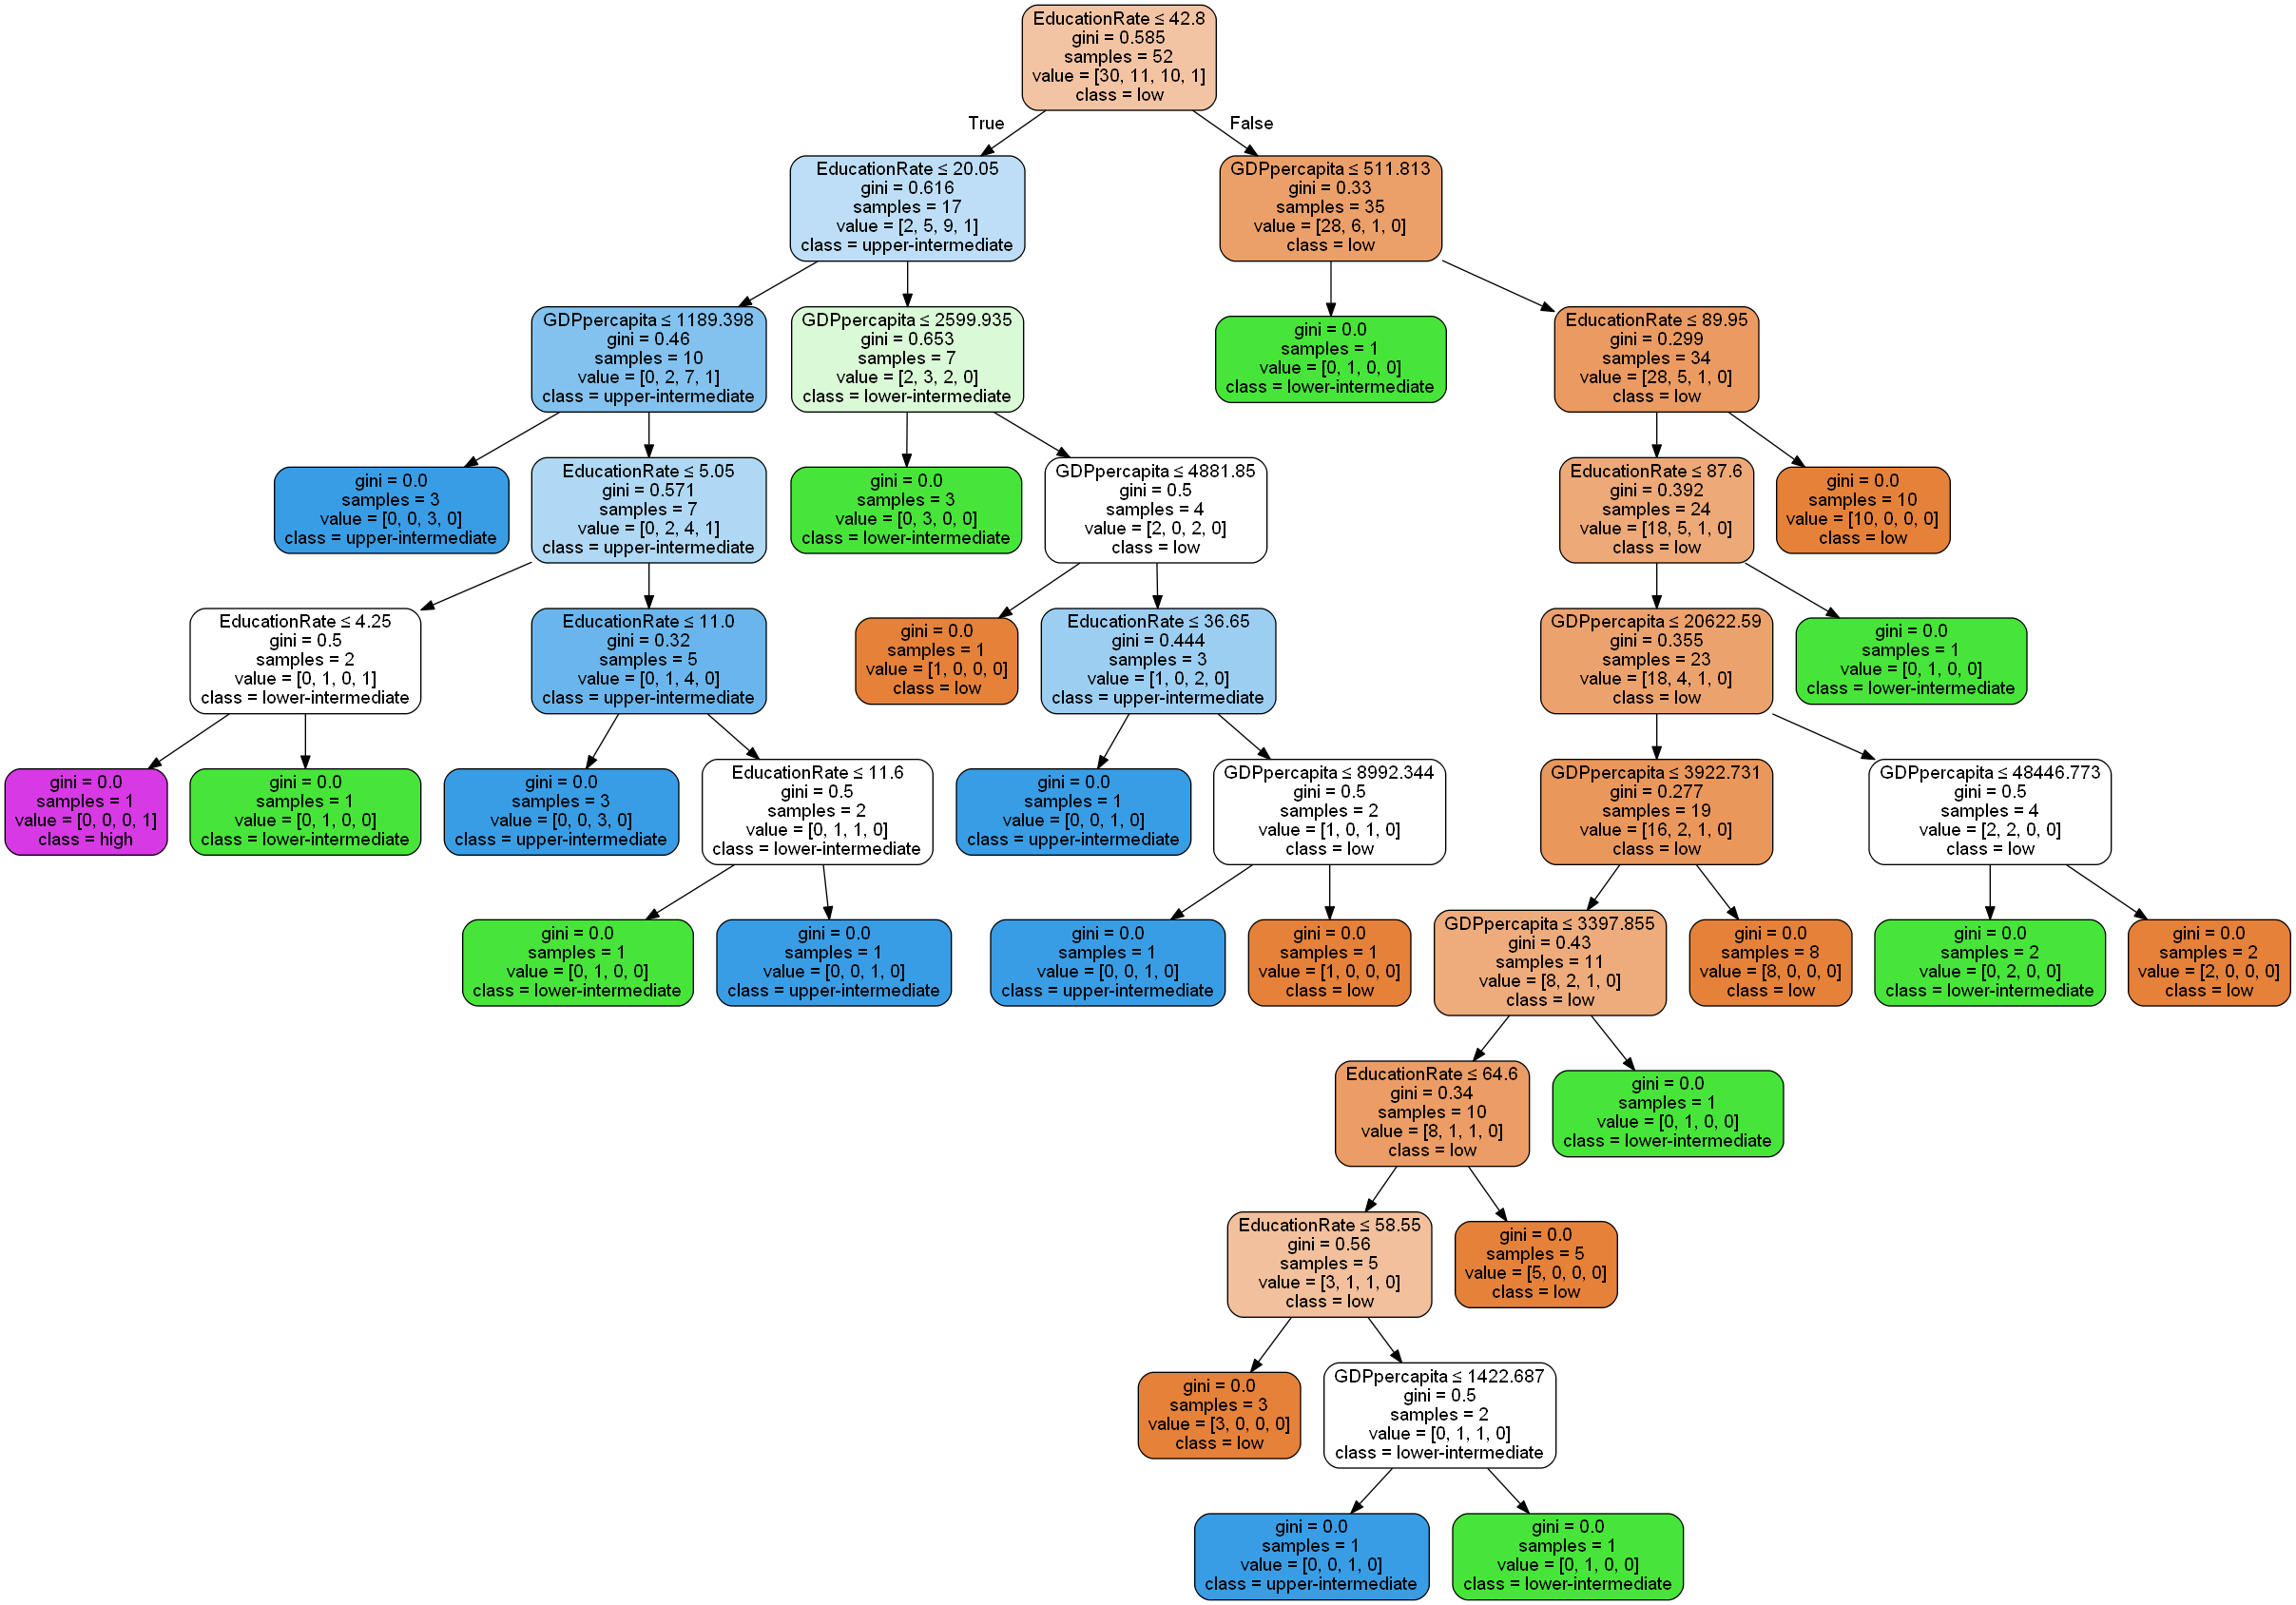

In [3]:
from IPython.display import Image
import pydotplus 
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


target_names=['low','lower-intermediate','upper-intermediate','high']
target_names=np.asarray(target_names)

dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['EducationRate' , 'GDPpercapita'],
                                class_names=target_names,filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [4]:
testData= data1[52:]
t_features=testData.values[:,:2]
t_target=testData.values[:,2:]

t_targetlist= []
for i in range (0,27):
    if   (t_target[i]>=70):
        t_targetlist.append(3)
    elif (t_target[i]>=40):
        t_targetlist.append(2)
    elif (t_target[i]>=20):
        t_targetlist.append(1)
    else:
        t_targetlist.append(0)
        
t_targetarray = np.asarray(t_targetlist)

In [5]:
print(clf.score(features,targetarray))
print(t_targetarray)
print(clf.predict(t_features[0:]))
print(clf.score(t_features,t_targetarray))
print(clf.predict_proba(t_features[0:]))

1.0
[2 0 2 3 2 3 2 0 1 0 3 0 3 1 0 1 1 0 1 2 2 2 2 2 1 2 2]
[2 1 2 3 2 3 3 0 0 2 2 1 1 2 1 2 1 0 0 2 2 1 2 2 0 3 2]
0.48148148148148145
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


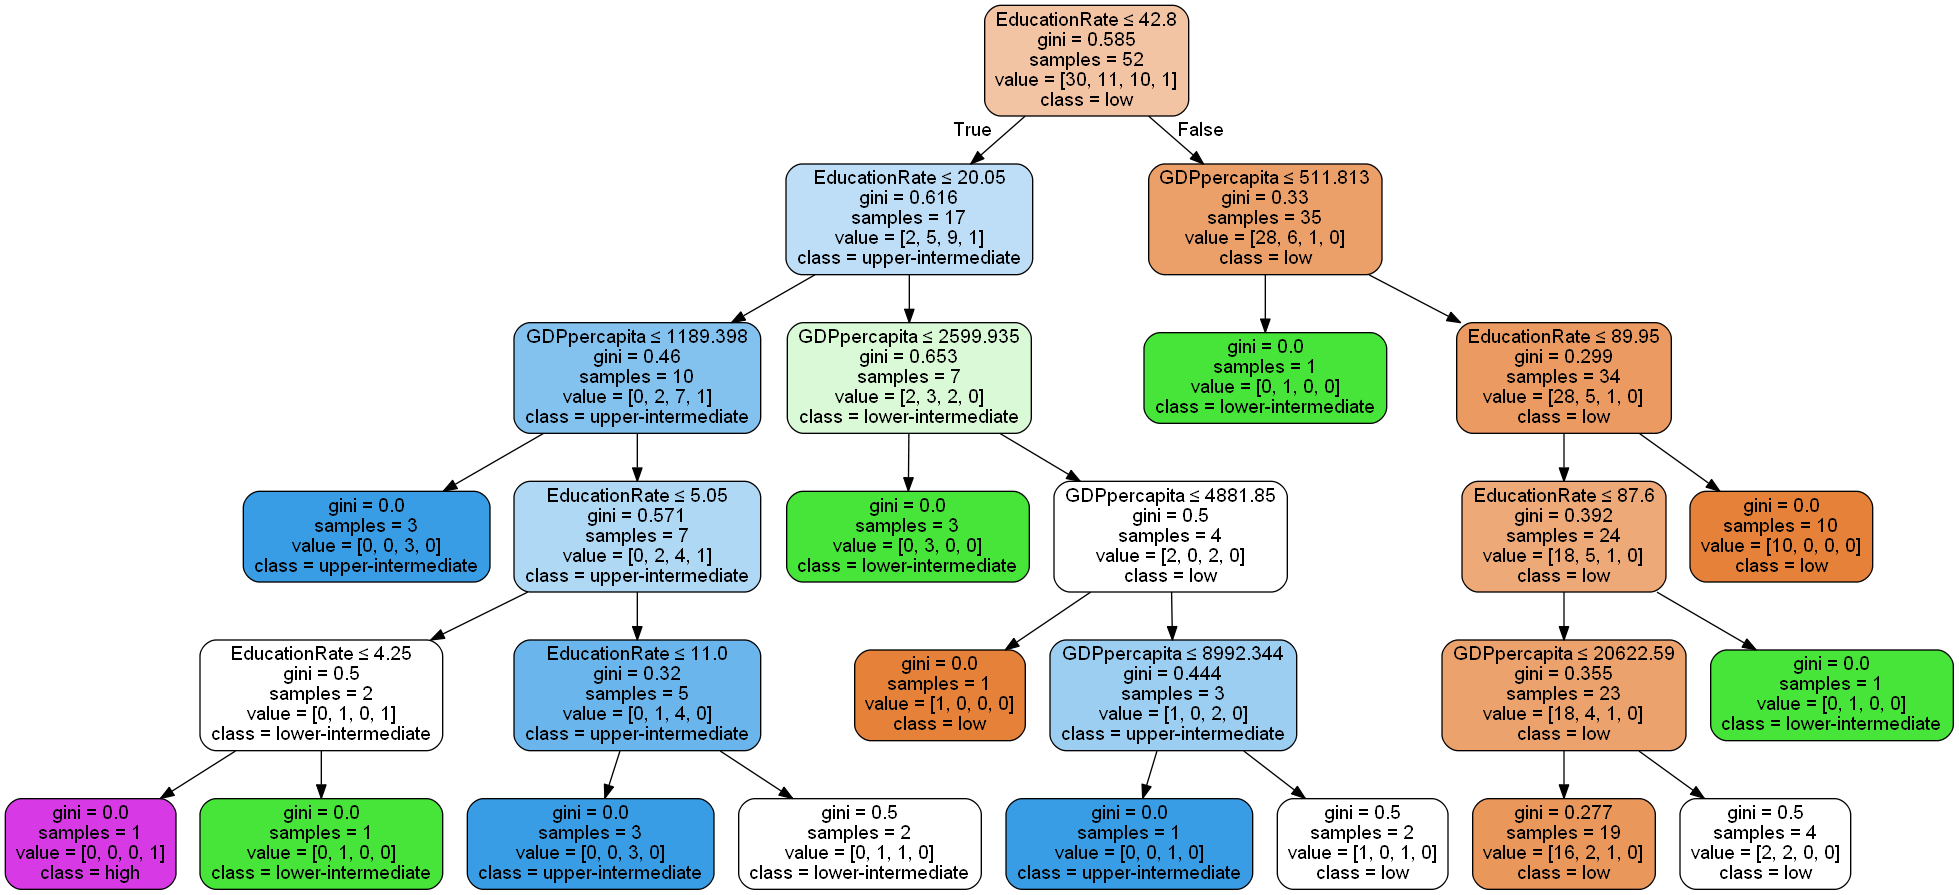

In [6]:
#2nd Decison Tree(Height 5)
clf2 = tree.DecisionTreeClassifier(max_depth = 5)
clf2 = clf2.fit(features, targetarray)
dot_data = tree.export_graphviz(clf2, out_file=None, feature_names=['EducationRate' , 'GDPpercapita'],  
                         class_names=target_names, filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [7]:
print(clf2.score(features,targetarray))
print(t_targetarray)
print(clf2.predict(t_features[0:]))
print(clf2.score(t_features,t_targetarray))
print(clf2.predict_proba(t_features[0:]))

0.8653846153846154
[2 0 2 3 2 3 2 0 1 0 3 0 3 1 0 1 1 0 1 2 2 2 2 2 1 2 2]
[2 1 2 3 2 3 3 0 0 0 2 1 0 0 1 1 1 0 0 2 2 1 1 2 0 3 2]
0.5185185185185185
[[0.         0.         1.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]
 [0.         0.         0.         1.        ]
 [0.84210526 0.10526316 0.05263158 0.        ]
 [0.84210526 0.10526316 0.05263158 0.        ]
 [0.5        0.         0.5        0.        ]
 [0.         0.         1.         0.        ]
 [0.         1.         0.         0.        ]
 [0.5        0.5        0.         0.        ]
 [0.5        0.         0.5        0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.5        0.5        0.        ]
 [0.         1.         0.         0.        ]
 [0.84210526 0.10526316 0.05263158 0.        ]
 [0.